# Datasets

In [2]:
from dataset import Monuseg, Swebcg, Bns
import matplotlib.pyplot as plt
def display_dataset(dataset, n=3):
    for i in dataset.ids[:3]:
        plt.figure(figsize=(20,20))
        plt.subplot(121)
        plt.imshow(dataset.load_image(i))
        plt.subplot(122)
        plt.imshow(dataset.get_mask(i))

## Monuseg
H&E stained. 30 images á 1000x1000, captured at 40 x magnification. Multi-organ.
https://monuseg.grand-challenge.org/Data/

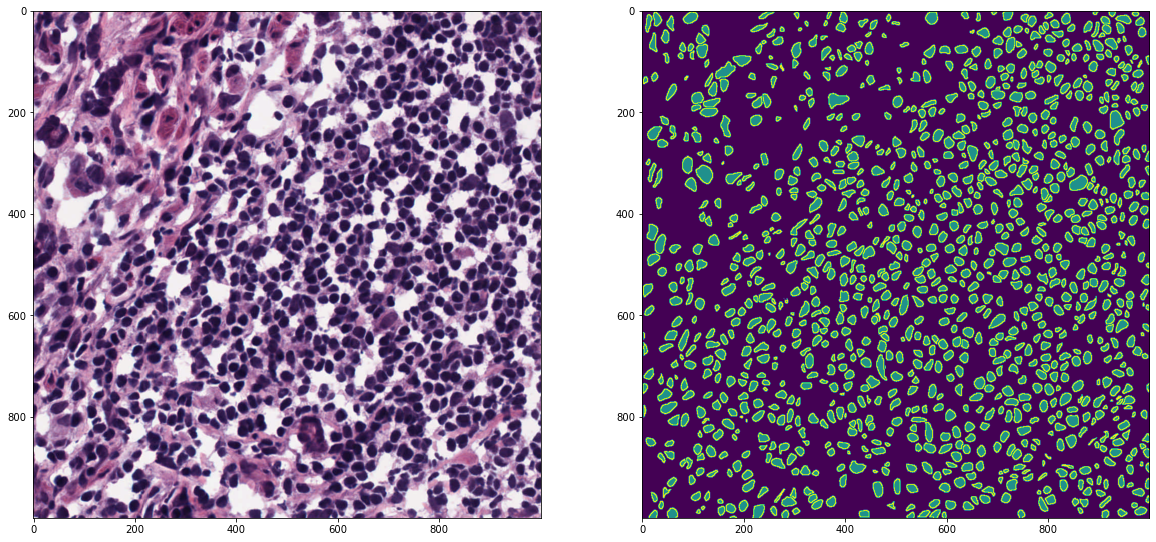

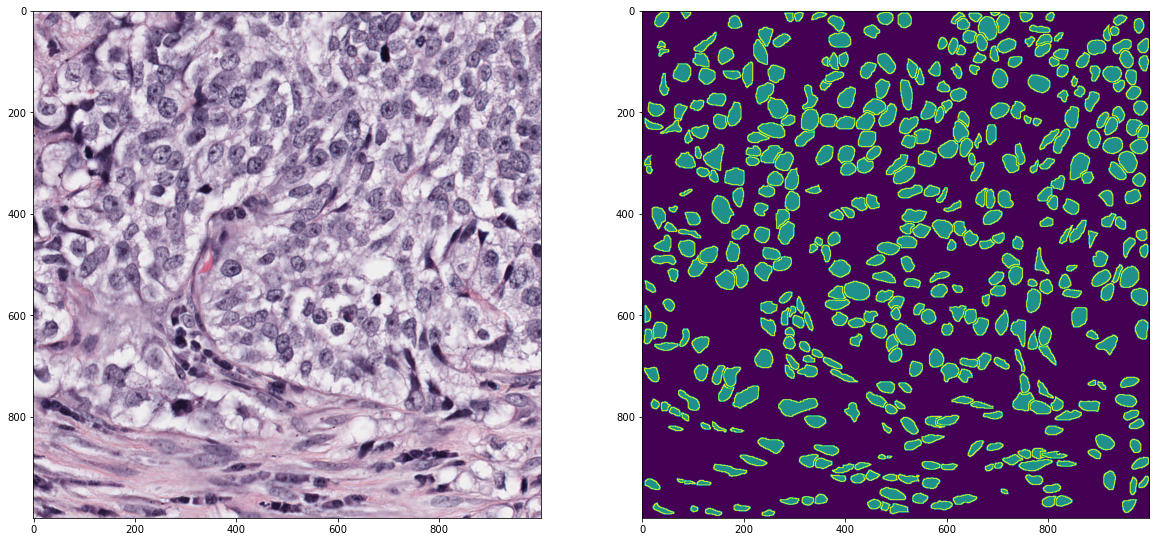

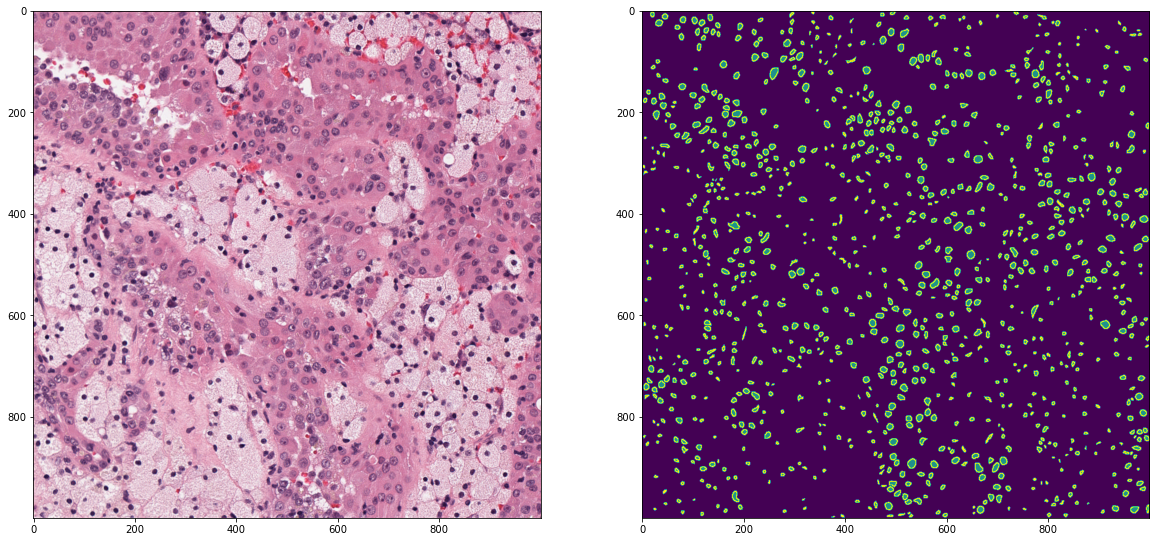

In [3]:
display_dataset(Monuseg(),1)

## BNS

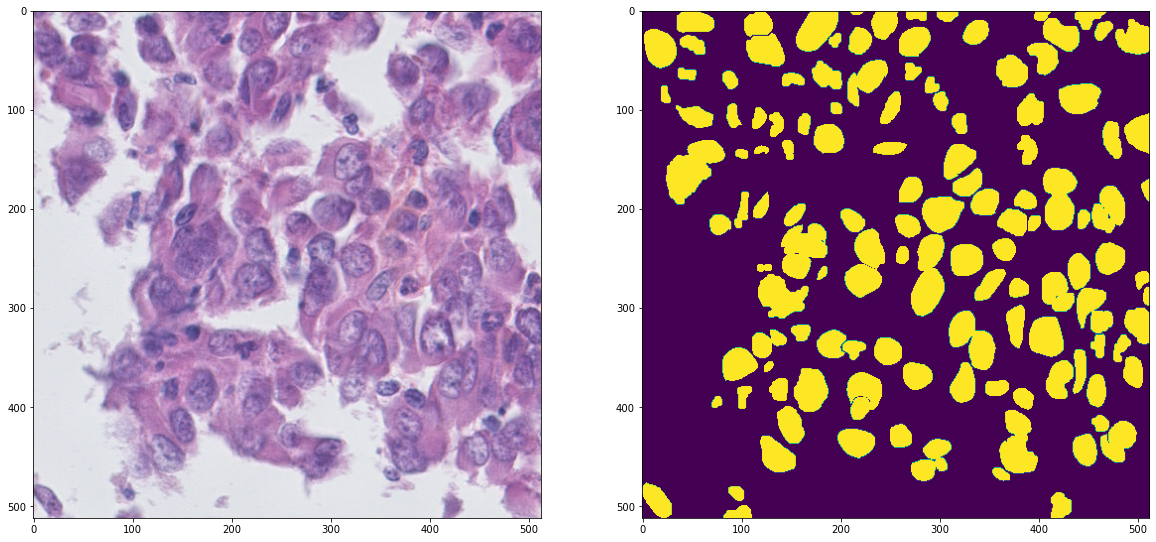

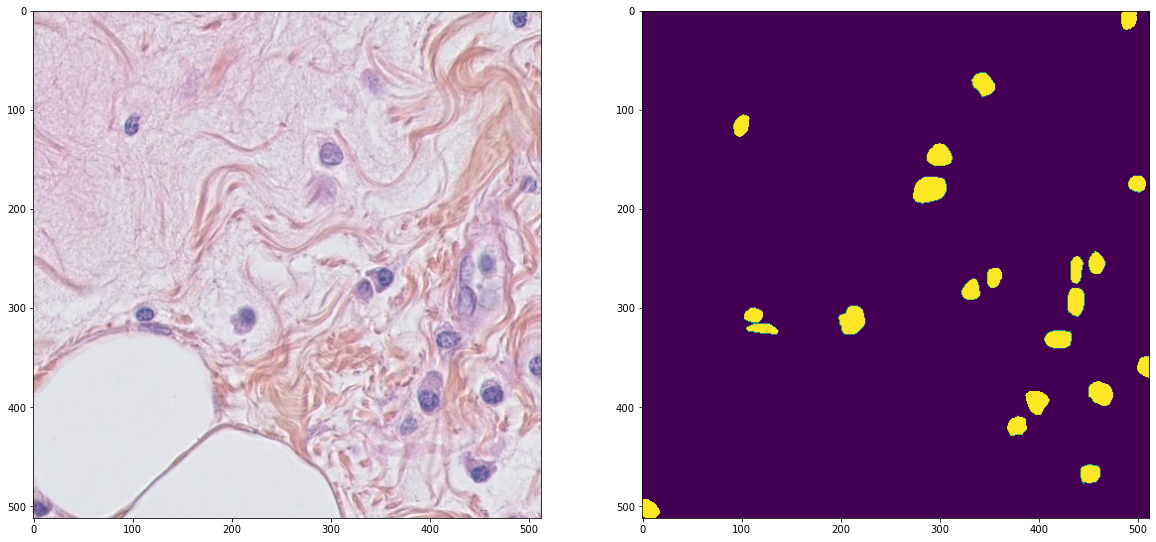

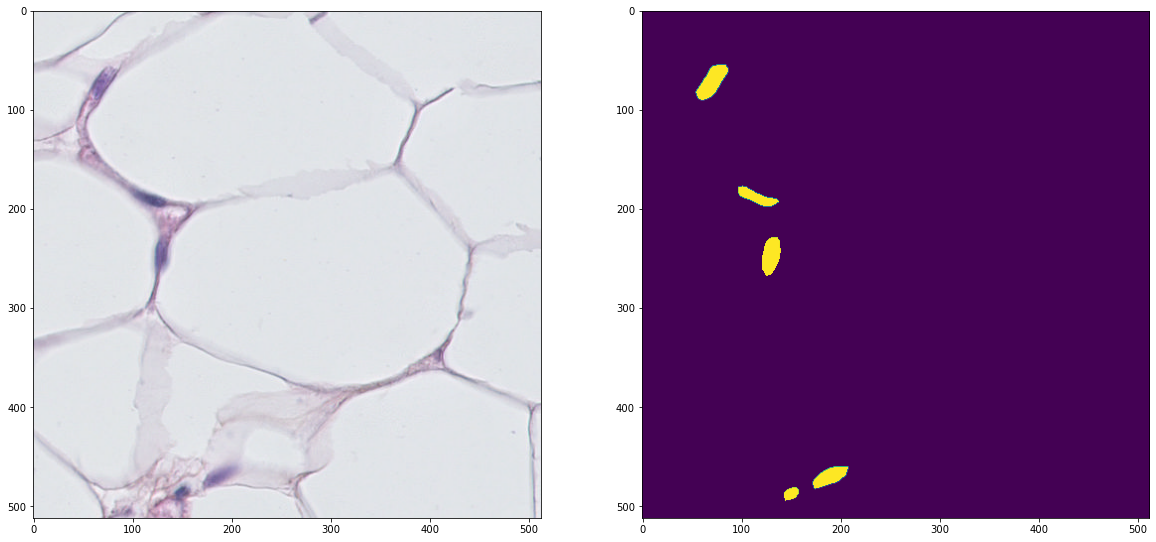

In [4]:
display_dataset(Bns(),9)

## SweBCG

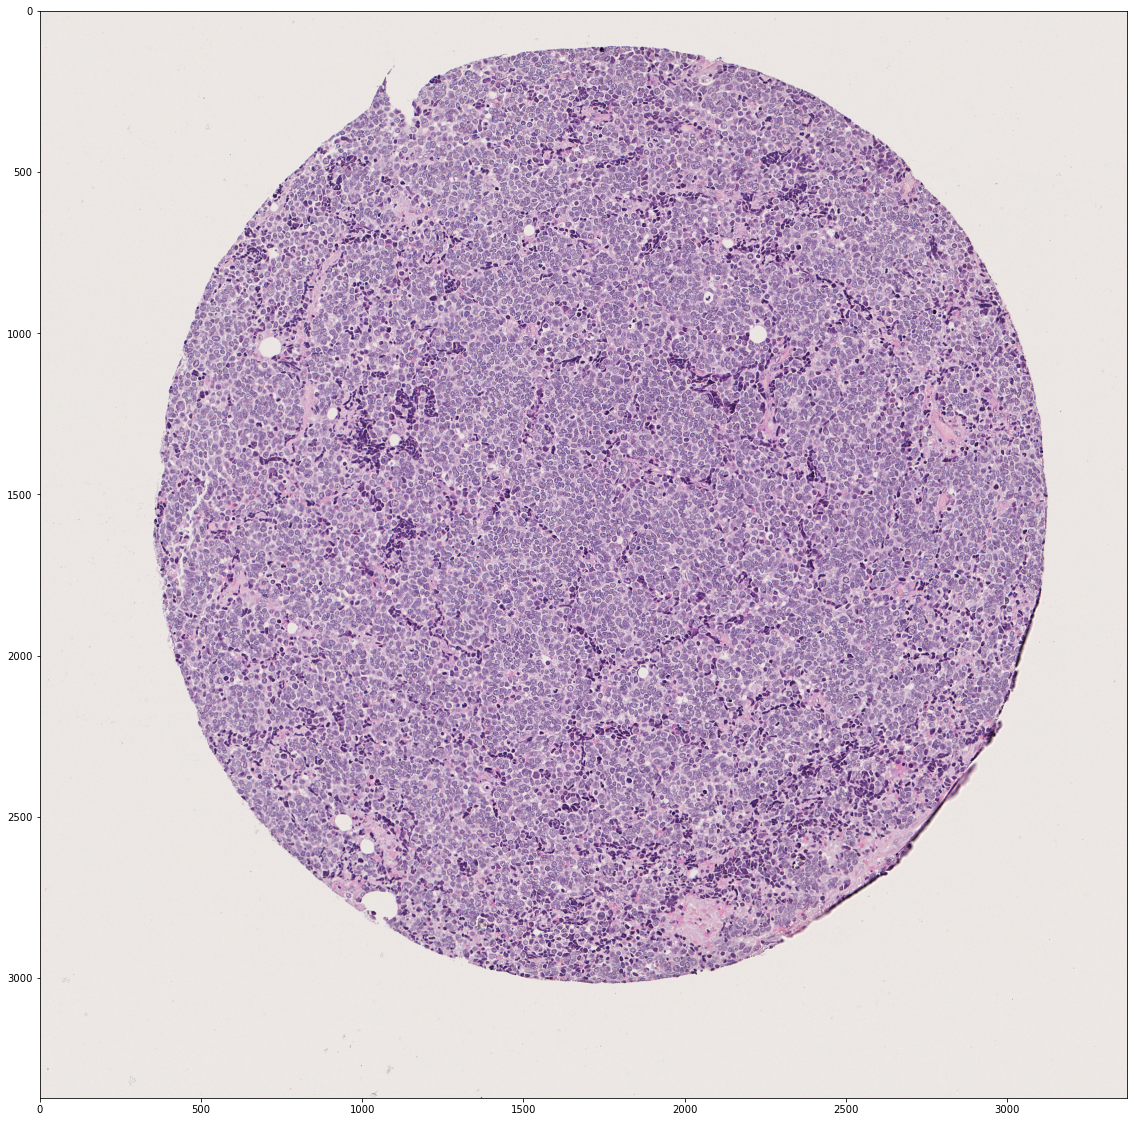

In [4]:
display_dataset(Swebcg(),1)

Help on itkTemplate in module itkTemplate object:

itk::ImageFileReader = class itkTemplate(builtins.object)
 |  itk::ImageFileReader(name)
 |  
 |  This class manages access to available template arguments of a C++ class.
 |  
 |  This class is generic and does not give help on the methods available in
 |  the instantiated class. To get help on a specific ITK class, instantiate an
 |  object of that class.
 |  
 |  e.g.: median = itk.MedianImageFilter[ImageType, ImageType].New()
 |        help(median)
 |  
 |  There are two ways to access types:
 |  
 |  1. With a dict interface. The user can manipulate template parameters
 |  similarly to C++, with the exception that the available parameters sets are
 |  chosen at compile time. It is also possible, with the dict interface, to
 |  explore the available parameters sets.
 |  2. With object attributes. The user can easily find the available parameters
 |  sets by pressing tab in interperter like ipython
 |  
 |  Methods defined here:
 | 

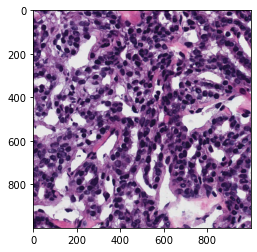

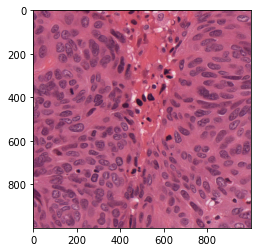

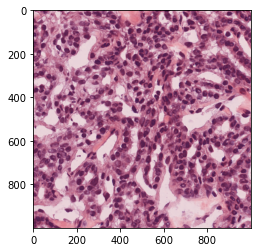

In [20]:
import itk
input_image_filename = '../data/monuseg/images/TCGA-2Z-A9J9-01A-01-TS1.png'
reference_image_filename = '../data/monuseg/images/TCGA-18-5592-01Z-00-DX1.png'
print(help(itk.ImageFileReader))
input_reader = itk.ImageFileReader.New(FileName=input_image_filename)
reference_reader = itk.ImageFileReader.New(FileName=reference_image_filename)

spcn_filter = itk.StructurePreservingColorNormalizationFilter.New(Input=input_reader.GetOutput())
spcn_filter.SetColorIndexSuppressedByHematoxylin(0)
spcn_filter.SetColorIndexSuppressedByEosin(1)
spcn_filter.SetInput(0, input_reader.GetOutput())
spcn_filter.SetInput(1, reference_reader.GetOutput())

output_writer = itk.ImageFileWriter.New(spcn_filter.GetOutput())
output_writer.SetInput(spcn_filter.GetOutput())
output_writer.SetFileName('test.png')
output_writer.Write()
plt.imshow(Monuseg().load_image('TCGA-2Z-A9J9-01A-01-TS1'))
plt.figure()
plt.imshow(Monuseg().load_image('TCGA-18-5592-01Z-00-DX1'))
from skimage.io import imread
plt.figure()
plt.imshow(imread('./test.png'))

import utils